<a href="https://colab.research.google.com/github/santyxd3000/Undergraduate-Project/blob/main/Fault_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE GRADO - CLASIFICACIÓN DE FALLAS**

Santiago Pardo Morales - 202013025

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import datetime
import scipy
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import io
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from scipy.optimize import curve_fit

In [314]:
ae_df = pd.read_csv('df_with_anomalies_ae1.csv',sep=';')
iqr_df = pd.read_csv('statistical_df_with_anomalies.csv',sep=';')
#sensor = pd.read_csv('sensor_data.csv',sep=';').dropna()

In [315]:
#ae_df = pd.merge(ae_df1, sensor, how="inner", on=["Timestamp"])

In [316]:
anomaly_iqr = iqr_df[iqr_df['Anomaly']==1]
no_anomaly_iqr = iqr_df[iqr_df['Anomaly']==0]

In [317]:
anomaly_ae = ae_df[ae_df['Anomaly']==1]
no_anomaly_ae = ae_df[ae_df['Anomaly']==0]

*CORRECCIÓN EVALUACIÓN DE MODELO*

In [318]:
stat_training_anomalies = iqr_df[iqr_df['Timestamp']<'2021-09-03']
stat_testing_anomalies = iqr_df[iqr_df['Timestamp']>'2021-09-03']

In [319]:
ml_training_anomalies = ae_df[ae_df['Timestamp']<'2021-09-03']
ml_testing_anomalies = ae_df[ae_df['Timestamp']>'2021-09-03']

In [320]:
iqr_train = np.array(stat_training_anomalies['Anomaly'])
iqr_test = np.array(stat_testing_anomalies['Anomaly'])
ml_train = np.array(ml_training_anomalies['Anomaly'])
ml_test = np.array(ml_testing_anomalies['Anomaly'])

*ENTRENAMIENTO*

In [321]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(iqr_train, ml_train)
precision = precision_score(iqr_train, ml_train)
f1_score = f1_score(iqr_train, ml_train)
recall = recall_score(iqr_train, ml_train)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.6247389755558285
Accuracy: 0.9325188778903712
F1_Score: 0.5958643313221252
Recall: 0.5695408734602464


In [322]:
#Make Confusion Matrix and Evaluate TP, TN, FN, FP
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(iqr_train, ml_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 5086
Number of TN: 90251
Number of FP: 3844
Number of FN: 3055


Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Train Data')

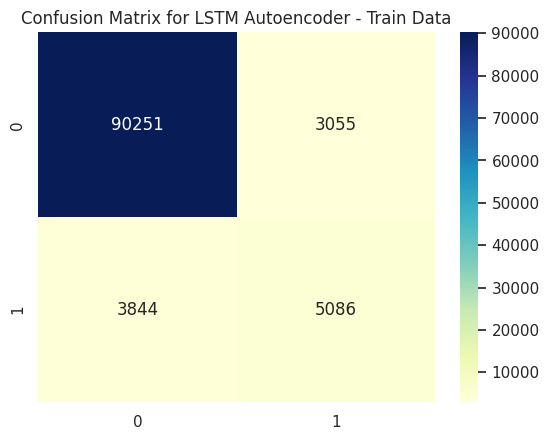

In [323]:
cm_train = confusion_matrix(iqr_train, ml_train)
sns.heatmap(cm_train,annot=True, fmt='g',cmap='YlGnBu')
# Set the axis labels and title
plt.title('Confusion Matrix for LSTM Autoencoder - Train Data')

*PRUEBA*

In [324]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(iqr_test, ml_test)
precision = precision_score(iqr_test, ml_test)
f1_score = f1_score(iqr_test, ml_test)
recall = recall_score(iqr_test, ml_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.974390488612421
Accuracy: 0.9763091233752751
F1_Score: 0.9855267330500411
Recall: 0.9969204711679113


In [325]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(iqr_test, ml_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38847
Number of TN: 8174
Number of FP: 120
Number of FN: 1021


Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Test Data')

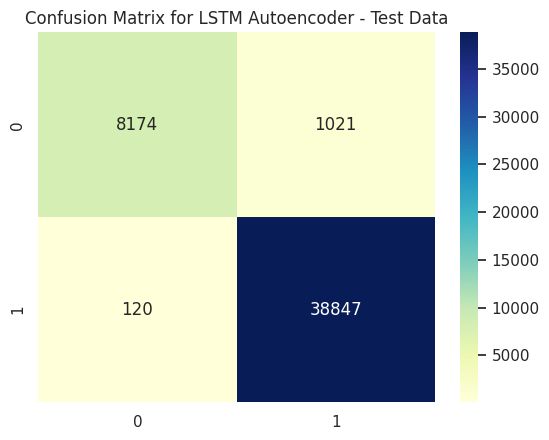

In [326]:
cm_test = confusion_matrix(iqr_test, ml_test)
sns.heatmap(cm_test,annot=True, fmt='g',cmap='YlGnBu')
# Set the axis labels and title
plt.title('Confusion Matrix for LSTM Autoencoder - Test Data')

In [327]:
anomaly_iqr_train = stat_training_anomalies[stat_training_anomalies['Anomaly']==1]
no_anomaly_iqr_train = stat_training_anomalies[stat_training_anomalies['Anomaly']==0]

In [328]:
anomaly_iqr_test = stat_testing_anomalies[stat_testing_anomalies['Anomaly']==1]
no_anomaly_iqr_test = stat_testing_anomalies[stat_testing_anomalies['Anomaly']==0]

In [329]:
anomaly_ae_train = ml_training_anomalies[ml_training_anomalies['Anomaly']==1]
no_anomaly_ae_train = ml_training_anomalies[ml_training_anomalies['Anomaly']==0]

In [330]:
anomaly_ae_test = ml_testing_anomalies[ml_testing_anomalies['Anomaly']==1]
no_anomaly_ae_test = ml_testing_anomalies[ml_testing_anomalies['Anomaly']==0]

## **COMPARACIÓN FINAL CON MÉTODO ESTADÍSTICO**

*Entrenamiento*

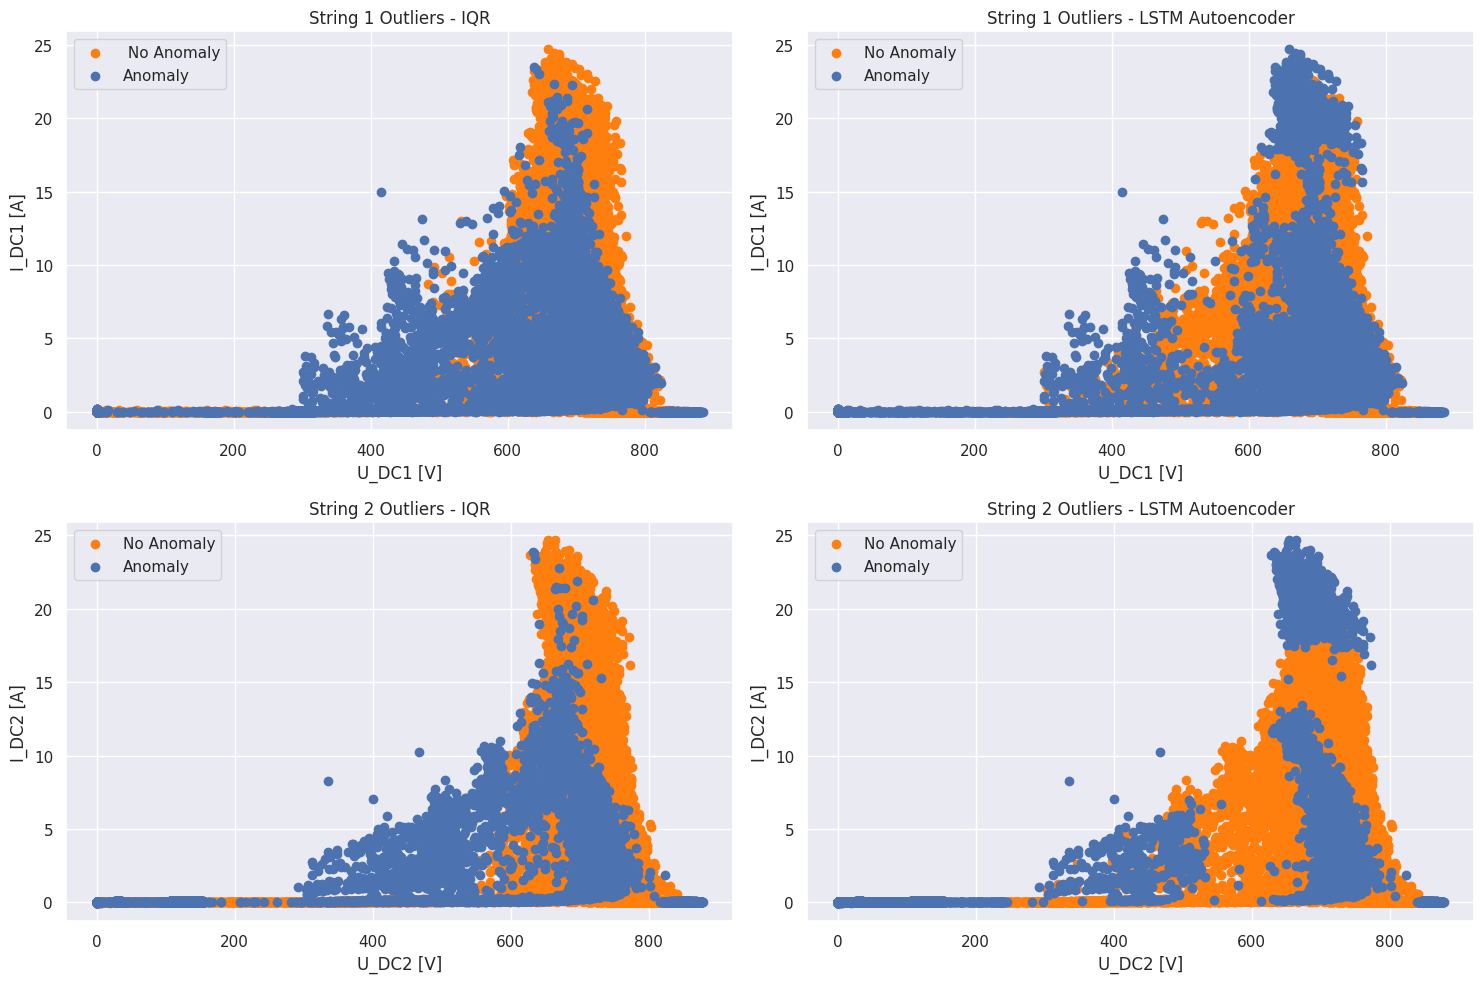

In [331]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))

# Gráfico 1
plt.subplot(2,2,1)
plt.scatter(no_anomaly_iqr['U_DC1'], no_anomaly_iqr['I_DC1'], label=' No Anomaly',color='tab:orange')
plt.scatter(anomaly_iqr['U_DC1'], anomaly_iqr['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,2)
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - LSTM Autoencoder')

plt.subplot(2,2,3)
plt.scatter(no_anomaly_iqr['U_DC2'], no_anomaly_iqr['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr['U_DC2'], anomaly_iqr['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,4)
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')



# Ajustes de diseño
plt.tight_layout()
plt.show()

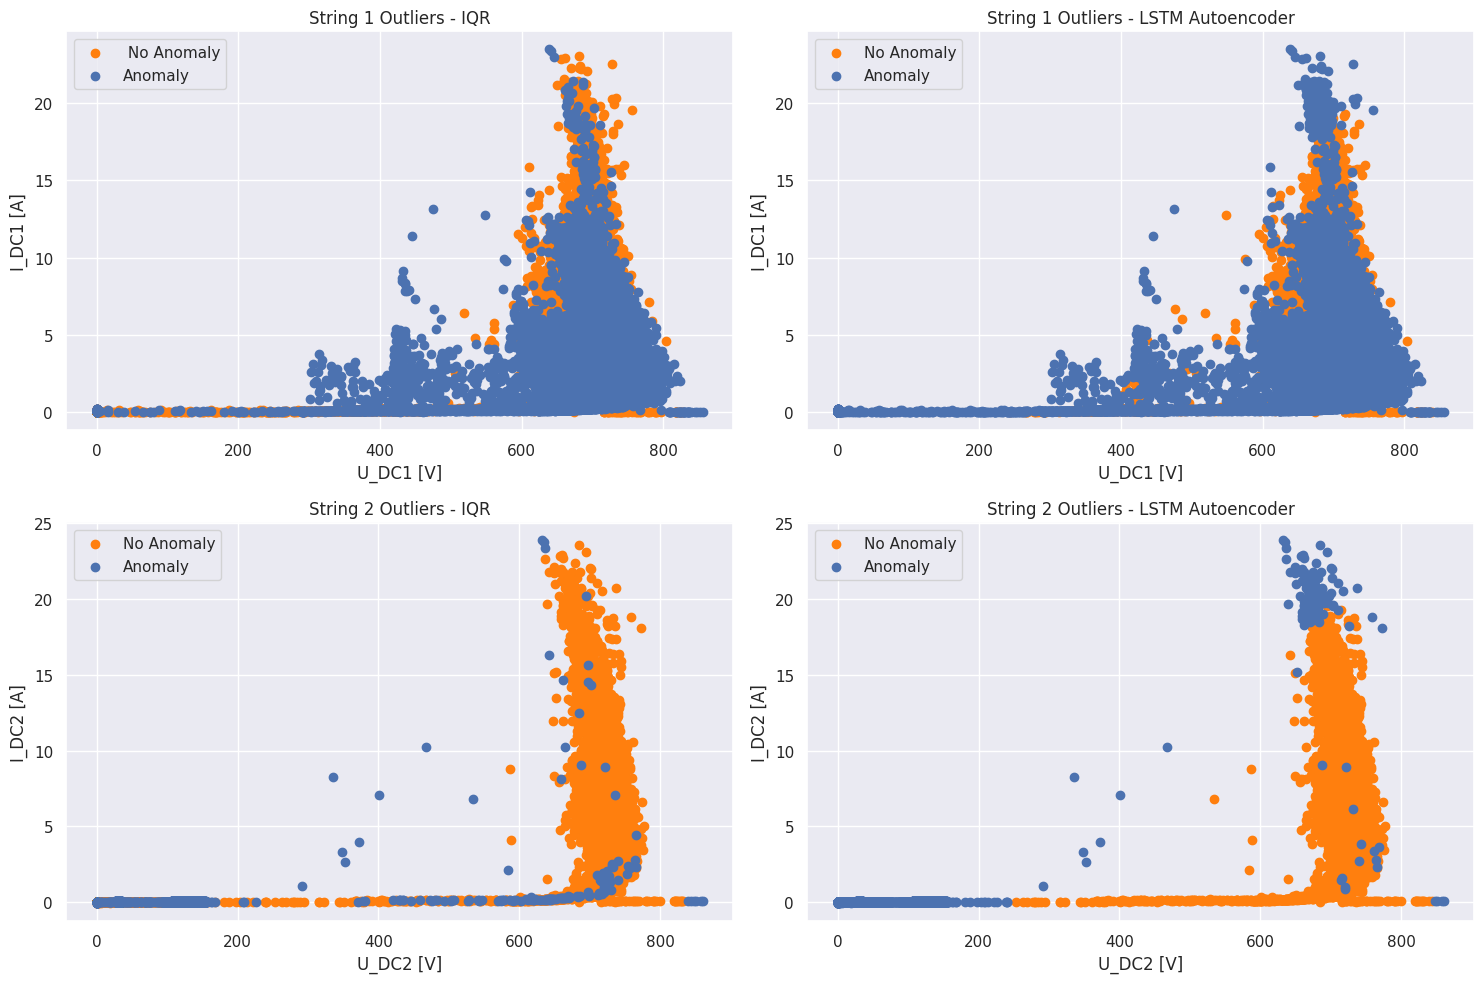

In [332]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))

# Gráfico 1
plt.subplot(2,2,1)
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label=' No Anomaly',color='tab:orange')
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,2)
plt.scatter(no_anomaly_ae_test['U_DC1'], no_anomaly_ae_test['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae_test['U_DC1'], anomaly_ae_test['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - LSTM Autoencoder')

plt.subplot(2,2,3)
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,4)
plt.scatter(no_anomaly_ae_test['U_DC2'], no_anomaly_ae_test['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae_test['U_DC2'], anomaly_ae_test['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')



# Ajustes de diseño
plt.tight_layout()
plt.show()

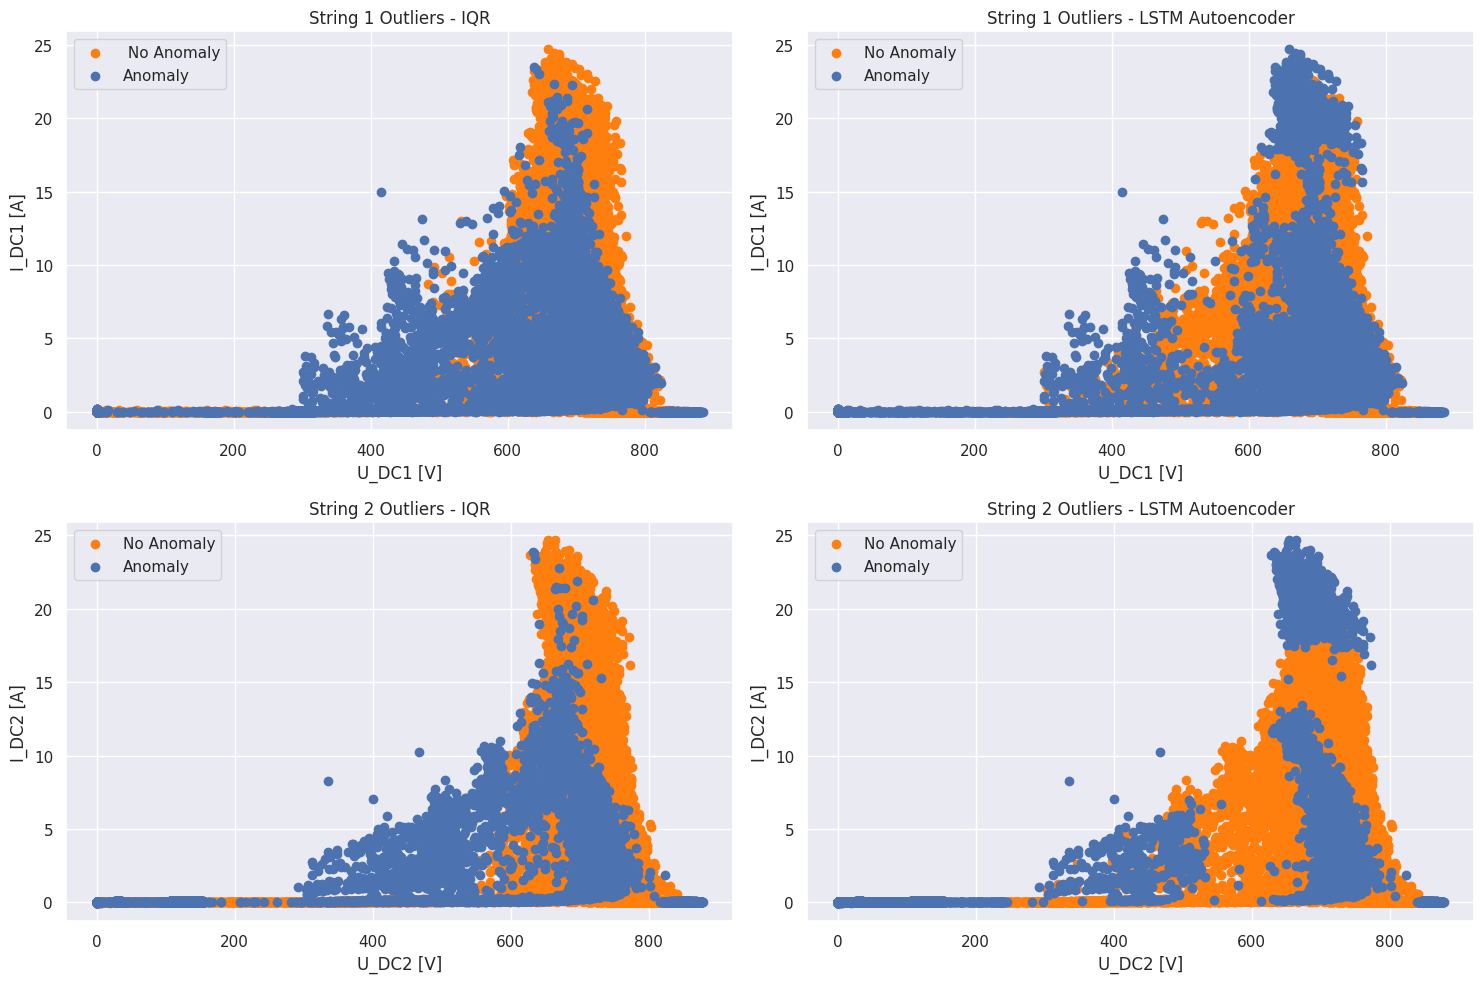

In [333]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))

# Gráfico 1
plt.subplot(2,2,1)
plt.scatter(no_anomaly_iqr['U_DC1'], no_anomaly_iqr['I_DC1'], label=' No Anomaly',color='tab:orange')
plt.scatter(anomaly_iqr['U_DC1'], anomaly_iqr['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,2)
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - LSTM Autoencoder')

plt.subplot(2,2,3)
plt.scatter(no_anomaly_iqr['U_DC2'], no_anomaly_iqr['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr['U_DC2'], anomaly_iqr['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,4)
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')



# Ajustes de diseño
plt.tight_layout()
plt.show()

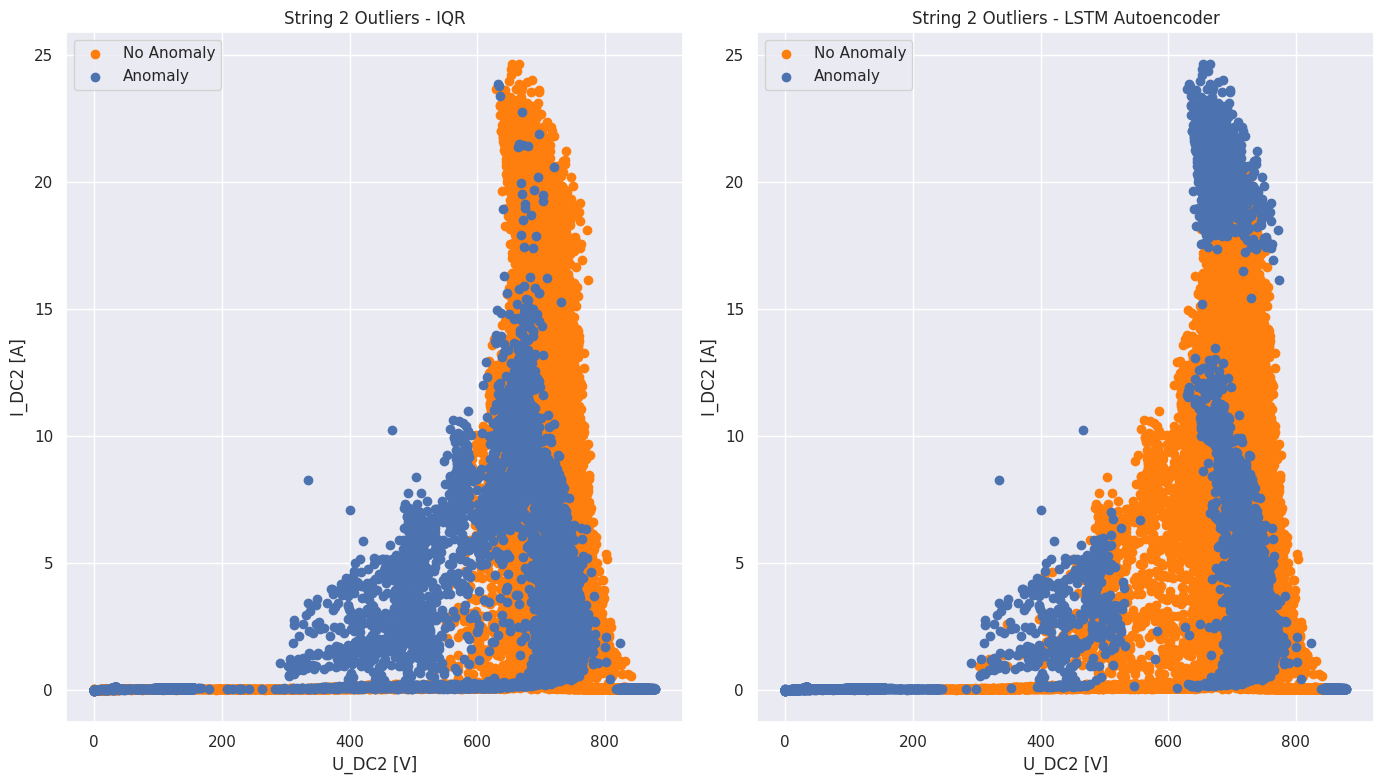

In [334]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))

# Gráfico 1
plt.subplot(1,2,1)
plt.scatter(no_anomaly_iqr['U_DC2'], no_anomaly_iqr['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr['U_DC2'], anomaly_iqr['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(1,2,2)
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

In [335]:
#Inicializar etiquetas - No fault
ae_df['Label'] = 'No Fault'
ae_df['Anomaly_String1'] = 'No Fault'
ae_df['Anomaly_String2'] = 'No Fault'

In [336]:
ae_df

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2
0,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,0,No Fault,No Fault,No Fault
1,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,0,No Fault,No Fault,No Fault
2,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,0,No Fault,No Fault,No Fault
3,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,0,No Fault,No Fault,No Fault
4,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,0,No Fault,No Fault,No Fault
...,...,...,...,...,...,...,...,...,...
150393,2023-06-02 10:10:00,712.860,698.410,15.514,15.758,0,No Fault,No Fault,No Fault
150394,2023-06-02 10:15:00,703.810,696.148,16.136,16.278,0,No Fault,No Fault,No Fault
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,No Fault
150396,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1,No Fault,No Fault,No Fault


## **ENCONTRAR VMP y IMP**

In [337]:
ae_df['P_DC1'] = ae_df['U_DC1']*ae_df['I_DC1']
ae_df['P_DC2'] = ae_df['U_DC2']*ae_df['I_DC2']

In [338]:
ae_df['P_DC1'].idxmax()

9019

In [339]:
ae_df['P_DC2'].idxmax()

9033

In [340]:
v_mp1 = ae_df['U_DC1'].iloc[9019]
i_mp1 = ae_df['I_DC1'].iloc[9019]

In [341]:
v_mp1,i_mp1

(716.312, 23.022)

In [342]:
v_mp2 = ae_df['U_DC2'].iloc[9033]
i_mp2 = ae_df['I_DC2'].iloc[9033]

In [343]:
v_mp2,i_mp2

(685.026, 24.02)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


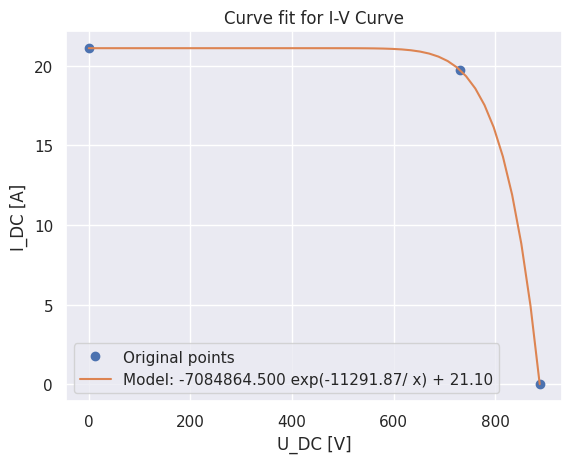

In [344]:
x = np.array([ 0.01,730.8,887.4])
y = np.array([21.1,19.72,0.01])

def fun(x, a, b, c):
    return a*np.exp(b/x)+c

coef,_ = curve_fit(fun, x, y)

plt.plot(x, y, 'o', label='Original points')
plt.xlabel('U_DC [V]')
plt.ylabel('I_DC [A]')
plt.title('Curve fit for I-V Curve')
plt.plot(np.linspace(x[0],x[-1]), fun(np.linspace(x[0],x[-1]), *coef), label=f'Model: %5.3f exp(%4.2f/ x) + %4.2f' % tuple(coef) )
plt.legend()
plt.show()

## STRING 1

<ipython-input-345-ef268199f47f>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

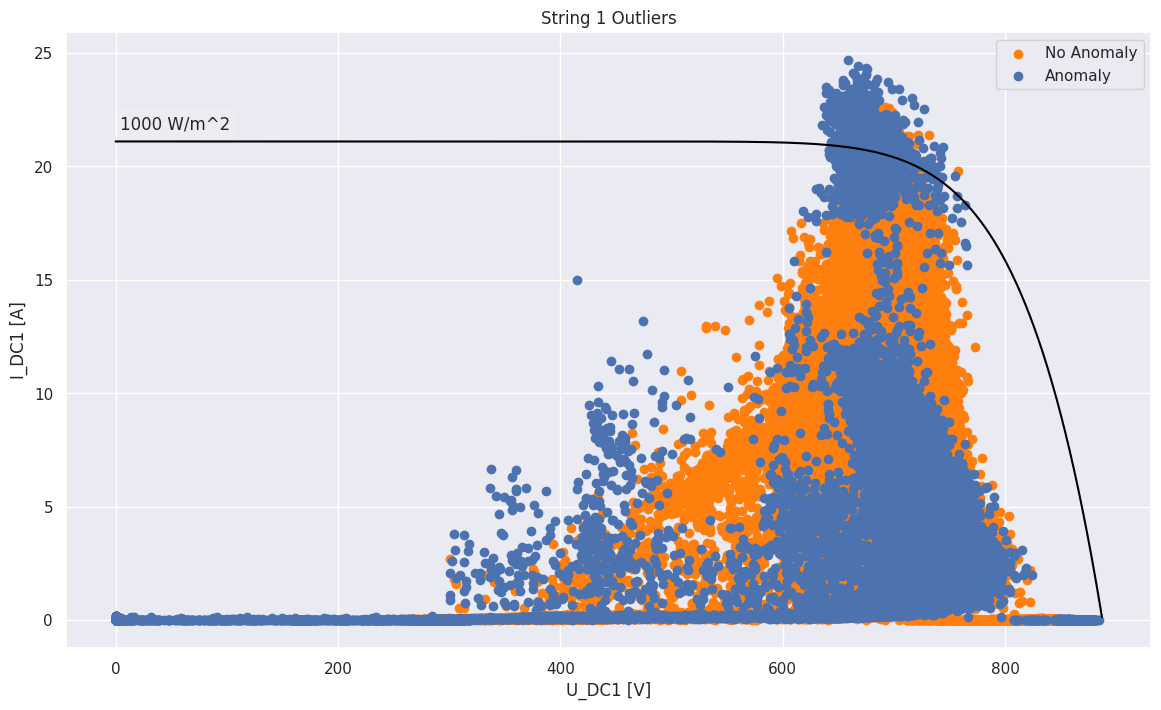

In [345]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

In [346]:
ae_df['P_DC1'].mean()

2918.472676096883

In [347]:
ae_df[(ae_df['P_DC1'] >= 2915) & (ae_df['P_DC1'] <= 2920) & (ae_df['I_DC1'] > 6)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
3519,2019-08-27 16:20:00,476.516,744.416,6.126,1.646,1,No Fault,No Fault,No Fault,2919.137016,1225.308736


In [348]:
ae_df[(ae_df['P_DC1'] >= 2915) & (ae_df['P_DC1'] <= 2920) & (ae_df['U_DC1'] > 400) & (ae_df['U_DC1'] < 500)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
3519,2019-08-27 16:20:00,476.516,744.416,6.126,1.646,1,No Fault,No Fault,No Fault,2919.137016,1225.308736


In [349]:
ae_df['I_DC1'].mean()

4.134151039242543

In [350]:
ae_df['U_DC1'].mean()

693.9819170002261

### SOMBREO

<ipython-input-351-763ad06fd398>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-351-763ad06fd398>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
<ipython-input-351-763ad06fd398>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
<ipython-input-351-763ad06fd398>:38: UserWarning: color i

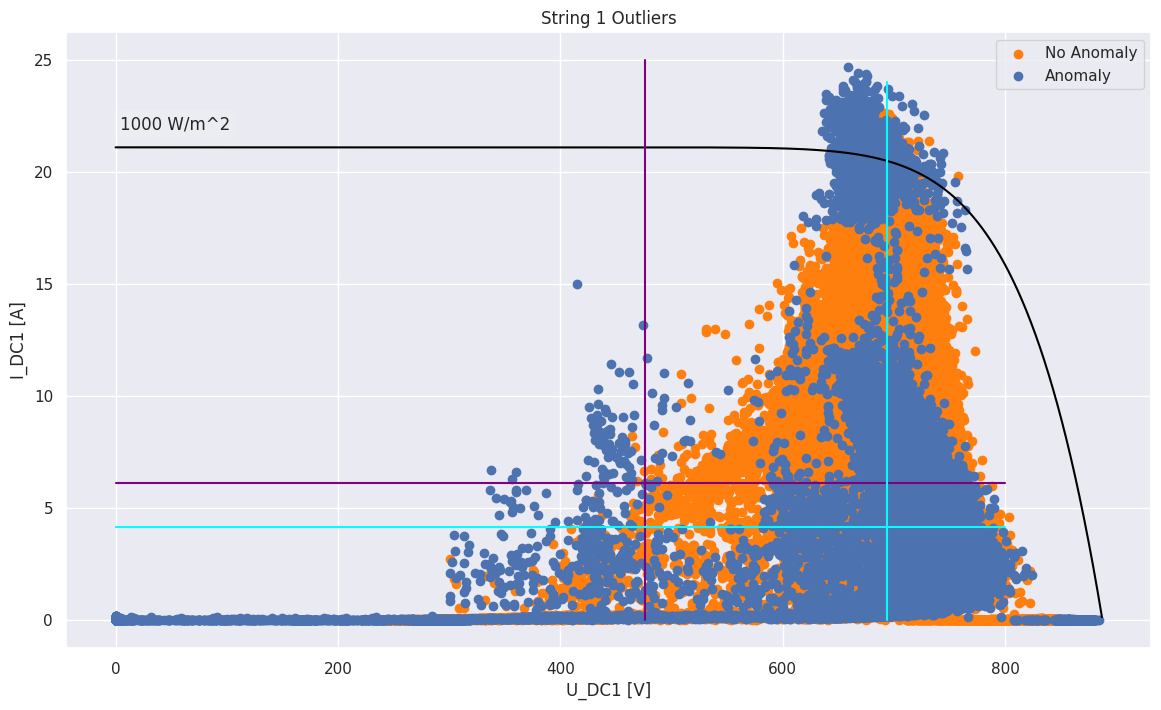

In [351]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

x_mean_power1 = 476.516
y_mean_power1 = 6.126

y_mean_power1_yaxis = np.arange(0,26,1)
x_mean_power1_yaxis = x_mean_power1*np.ones(y_mean_power1_yaxis.shape[0])

x_mean_power1_xaxis = np.arange(0,900,100)
y_mean_power1_xaxis = y_mean_power1*np.ones(x_mean_power1_xaxis.shape[0])

x_mean_voltage1 = 693.9819170002261
y_mean_current1 = 4.134151039242543

y_mean_voltage1_axis = np.arange(0,25,1)
x_mean_voltage1_axis = x_mean_voltage1*np.ones(y_mean_voltage1_axis.shape[0])

x_mean_current1_axis = np.arange(0,900,100)
y_mean_current1_axis = y_mean_current1*np.ones(x_mean_current1_axis.shape[0])


plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
plt.plot(x_mean_voltage1_axis, y_mean_voltage1_axis, 'r', color='cyan')
plt.plot(x_mean_current1_axis, y_mean_current1_axis, 'r', color='cyan')

Los datos de sombreo son entonces, aquellos que están en el cuadrante inferior izquierdo y son superiores a 0

In [352]:
shading_power1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC1']< x_mean_power1) & (ae_df['I_DC1']< y_mean_power1)]
shading_voltage1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC1']< x_mean_voltage1) & (ae_df['I_DC1']< 19.1)]
shading_current1 = ae_df[(ae_df['Anomaly'] == 1) &(ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['I_DC1']< y_mean_current1) ]

In [353]:
shading_union = shading_power1.index.union(shading_voltage1.index).union(shading_current1.index)

In [354]:
ae_df.loc[shading_union,'Anomaly_String1'] = 'Shading'

In [355]:
ae_df[ae_df['Anomaly_String1'] == 'Shading']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
431,2019-08-06 05:45:00,196.260,196.073,0.010,0.017,1,No Fault,Shading,No Fault,1.962600,3.333241
718,2019-08-08 06:05:00,235.070,236.358,0.010,0.020,1,No Fault,Shading,No Fault,2.350700,4.727160
979,2019-08-09 16:00:00,434.194,727.848,8.924,0.942,1,No Fault,Shading,No Fault,3874.747256,685.632816
980,2019-08-09 16:05:00,436.146,732.408,8.900,1.306,1,No Fault,Shading,No Fault,3881.699400,956.524848
981,2019-08-09 16:10:00,438.282,723.834,8.092,0.950,1,No Fault,Shading,No Fault,3546.577944,687.642300
...,...,...,...,...,...,...,...,...,...,...,...
150173,2023-05-31 15:35:00,599.182,372.124,7.186,3.976,1,No Fault,Shading,No Fault,4305.721852,1479.565024
150177,2023-05-31 15:55:00,437.930,352.176,7.802,2.686,1,No Fault,Shading,No Fault,3416.729860,945.944736
150178,2023-05-31 16:00:00,434.826,347.726,7.842,3.326,1,No Fault,Shading,No Fault,3409.905492,1156.536676
150339,2023-06-02 05:40:00,94.104,94.308,0.004,0.010,1,No Fault,Shading,No Fault,0.376416,0.943080


### CORTO CIRCUITO

<ipython-input-356-d1228ac7cd2e>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-356-d1228ac7cd2e>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
<ipython-input-356-d1228ac7cd2e>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')


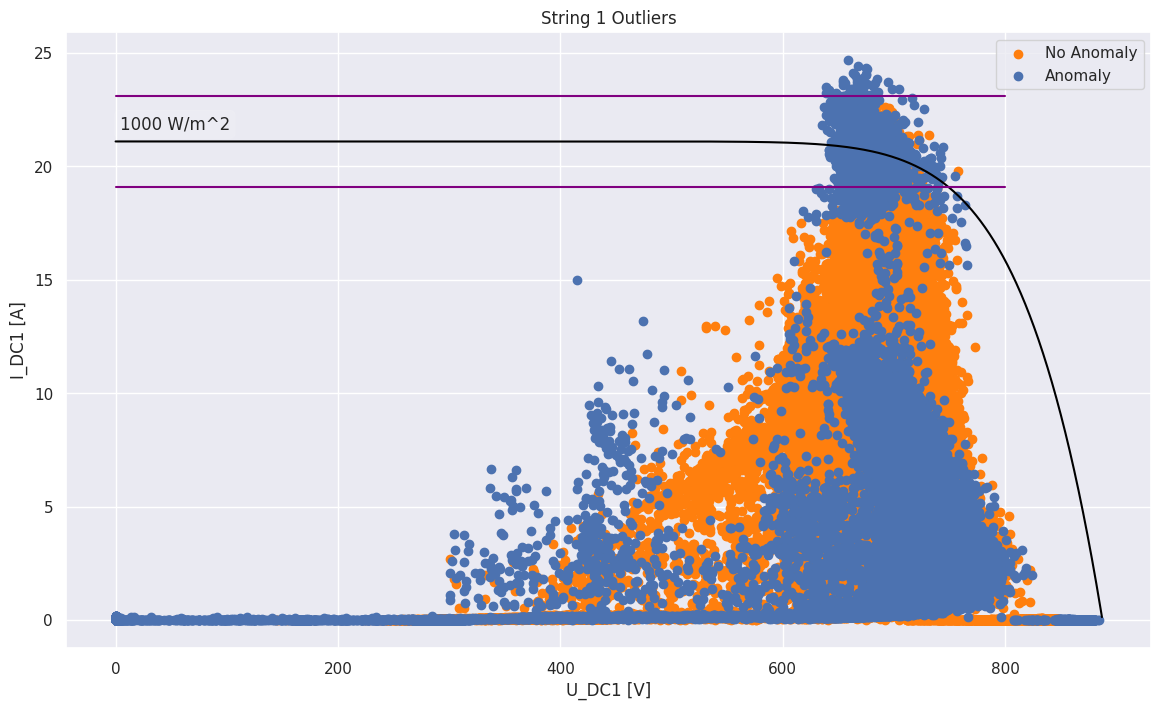

In [356]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')

In [357]:
sc_fault1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>=lower_limit_idc) & (ae_df['I_DC1']<=upper_limit_idc)]

In [358]:
index_sc1 = sc_fault1.index

In [359]:
ae_df.loc[index_sc1,'Anomaly_String1'] = 'Short Circuit'

In [360]:
ae_df[ae_df['Anomaly_String1'] == 'Short Circuit']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
635,2019-08-07 10:55:00,692.188,694.534,19.604,19.528,1,No Fault,Short Circuit,No Fault,13569.653552,13562.859952
636,2019-08-07 11:00:00,690.400,691.584,19.830,19.744,1,No Fault,Short Circuit,No Fault,13690.632000,13654.634496
637,2019-08-07 11:05:00,686.156,698.624,20.382,19.832,1,No Fault,Short Circuit,No Fault,13985.231592,13855.111168
638,2019-08-07 11:10:00,686.426,690.652,19.680,19.798,1,No Fault,Short Circuit,No Fault,13508.863680,13673.528296
639,2019-08-07 11:15:00,680.792,687.284,20.836,20.948,1,No Fault,Short Circuit,No Fault,14184.982112,14397.225232
...,...,...,...,...,...,...,...,...,...,...,...
150119,2023-05-31 11:05:00,690.784,682.082,19.938,20.456,1,No Fault,Short Circuit,No Fault,13772.851392,13952.669392
150122,2023-05-31 11:20:00,682.886,675.352,19.282,19.828,1,No Fault,Short Circuit,No Fault,13167.407852,13390.879456
150123,2023-05-31 11:25:00,677.530,665.904,20.820,21.242,1,No Fault,Short Circuit,No Fault,14106.174600,14145.132768
150127,2023-05-31 11:45:00,687.436,689.036,19.520,19.038,1,No Fault,Short Circuit,No Fault,13418.750720,13117.867368


### CIRCUITO ABIERTO

Todas aquellas fallas cuya corriente sea igual a 0

<ipython-input-361-7868ff17009c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-361-7868ff17009c>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(voltage_zeros, current, 'r', color='purple')


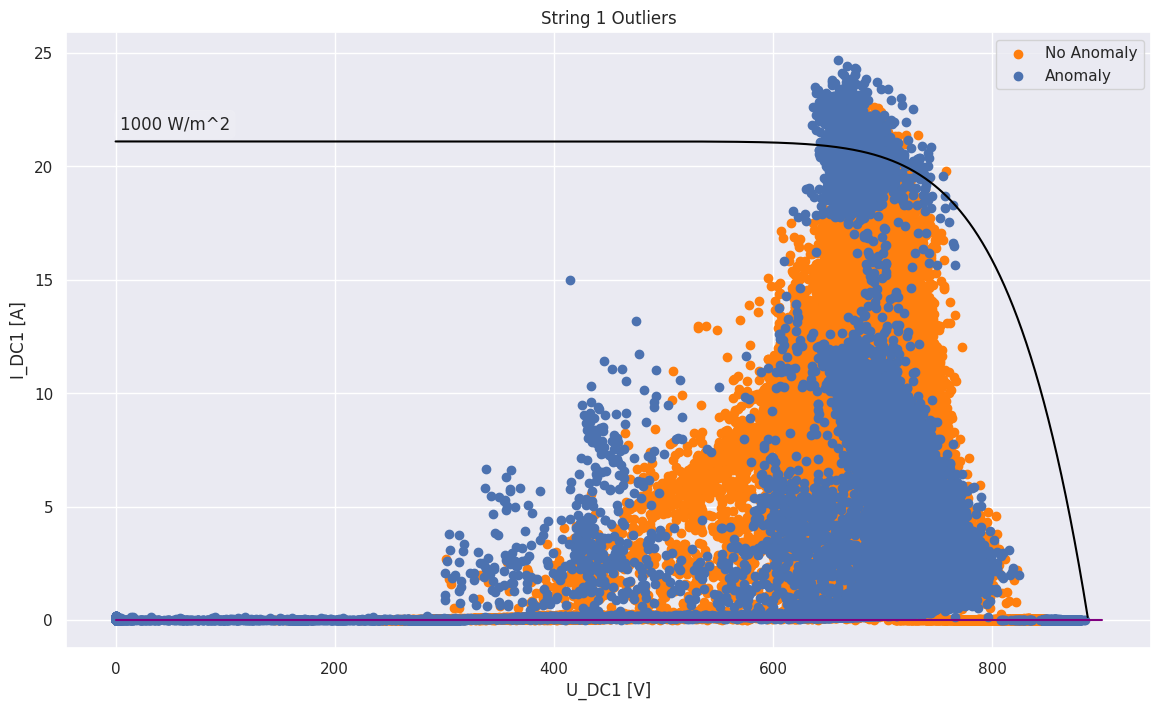

In [361]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

current = np.zeros(10)
voltage_zeros = np.arange(0,1000,100)


plt.plot(voltage_zeros, current, 'r', color='purple')

In [362]:
oc_fault1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']==0) & (ae_df['U_DC1']!=0) ]

In [363]:
oc_fault1.shape

(970, 11)

In [364]:
index_oc1 = oc_fault1.index

In [365]:
ae_df.loc[index_oc1,'Anomaly_String1'] = 'Open Circuit'

In [366]:
ae_df[(ae_df['Anomaly_String1'] == 'Open Circuit')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
15137,2019-11-18 06:35:00,843.602,849.354,0.0,0.050,1,No Fault,Open Circuit,No Fault,0.0,42.467700
15138,2019-11-18 06:40:00,858.404,860.010,0.0,0.050,1,No Fault,Open Circuit,No Fault,0.0,43.000500
15139,2019-11-18 06:45:00,859.712,861.674,0.0,0.050,1,No Fault,Open Circuit,No Fault,0.0,43.083700
15140,2019-11-18 06:50:00,858.786,861.078,0.0,0.050,1,No Fault,Open Circuit,No Fault,0.0,43.053900
15141,2019-11-18 06:55:00,856.822,859.138,0.0,0.050,1,No Fault,Open Circuit,No Fault,0.0,42.956900
...,...,...,...,...,...,...,...,...,...,...,...
100036,2021-07-15 08:15:00,849.732,851.640,0.0,0.058,1,No Fault,Open Circuit,No Fault,0.0,49.395120
100037,2021-07-15 08:20:00,846.608,849.584,0.0,0.060,1,No Fault,Open Circuit,No Fault,0.0,50.975040
100038,2021-07-15 08:25:00,846.132,848.322,0.0,0.060,1,No Fault,Open Circuit,No Fault,0.0,50.899320
101158,2021-07-23 09:05:00,855.676,855.888,0.0,0.042,1,No Fault,Open Circuit,No Fault,0.0,35.947296


### FALLA NO IDENTIFICADA

<ipython-input-367-222e33a97008>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-367-222e33a97008>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')


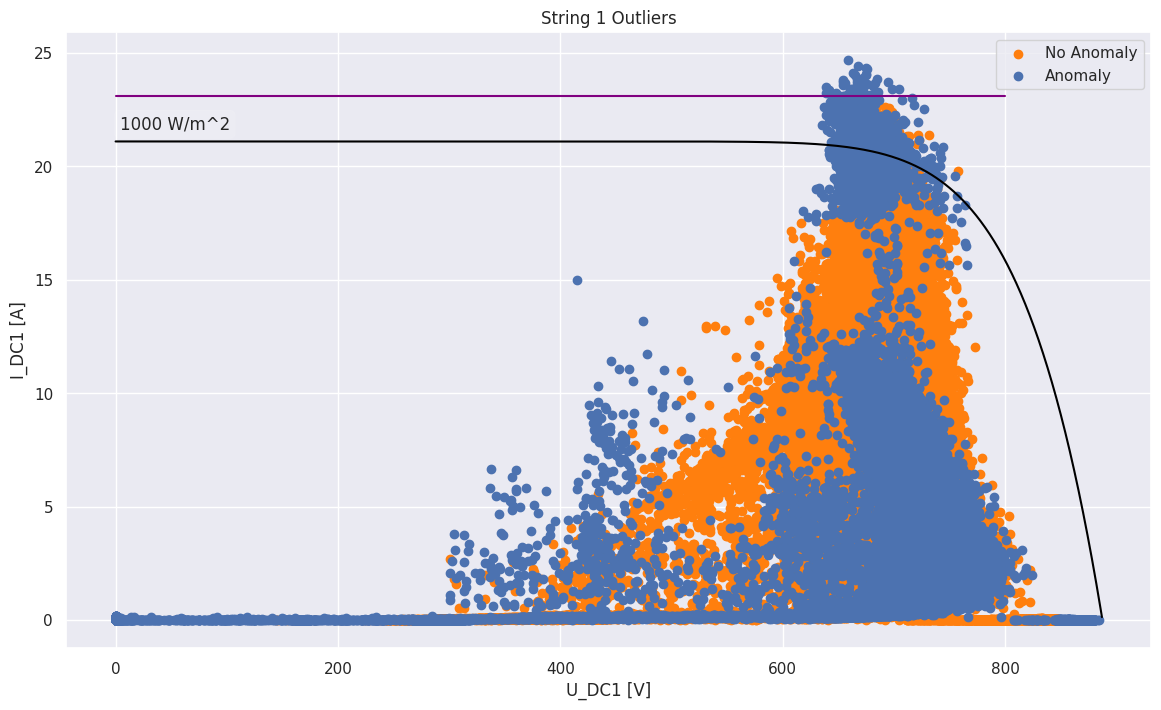

In [367]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')

In [368]:
unknown_1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>=upper_limit_idc)]

In [369]:
index_u1 = unknown_1.index

In [370]:
ae_df.loc[index_u1,'Anomaly_String1'] = 'Unknown'

In [371]:
ae_df[(ae_df['Anomaly_String1'] == 'Unknown')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
6890,2019-09-21 11:40:00,672.568,709.216,23.908,20.434,1,No Fault,Unknown,No Fault,16079.755744,14492.119744
8748,2019-10-04 11:55:00,681.868,724.454,23.206,20.618,1,No Fault,Unknown,No Fault,15823.428808,14936.792572
9020,2019-10-06 10:45:00,698.314,731.850,23.412,19.380,1,No Fault,Unknown,No Fault,16348.927368,14183.253000
9021,2019-10-06 10:50:00,675.496,720.944,24.274,19.798,1,No Fault,Unknown,No Fault,16396.989904,14273.249312
9027,2019-10-06 11:20:00,704.776,740.380,23.394,19.440,1,No Fault,Unknown,No Fault,16487.529744,14392.987200
9028,2019-10-06 11:25:00,674.840,722.888,24.354,19.904,1,No Fault,Unknown,No Fault,16435.053360,14388.362752
11769,2019-10-25 12:35:00,660.612,669.572,23.192,22.520,1,No Fault,Unknown,No Fault,15320.913504,15078.761440
12747,2019-11-01 10:20:00,658.870,710.360,23.202,20.572,1,No Fault,Unknown,No Fault,15287.101740,14613.525920
12752,2019-11-01 10:45:00,669.722,724.146,23.796,19.986,1,No Fault,Unknown,No Fault,15936.704712,14472.781956
12753,2019-11-01 10:50:00,662.710,714.036,24.110,20.548,1,No Fault,Unknown,No Fault,15977.938100,14672.011728


## STRING 2

<ipython-input-372-c37a9240a5b8>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

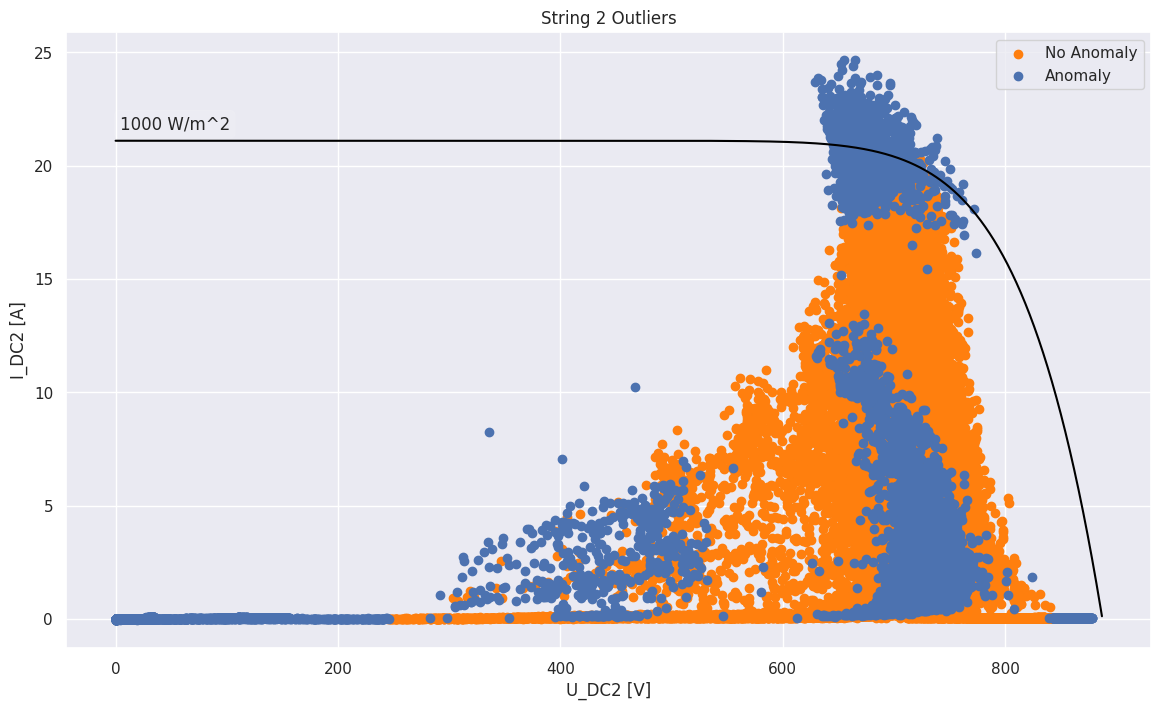

In [372]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

In [373]:
ae_df['P_DC2'].mean()

2091.0071947071306

In [374]:
ae_df[(ae_df['P_DC2'] >= 2000) & (ae_df['P_DC2'] <= 2100) & (ae_df['I_DC2'] >= 4.5)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
5661,2019-09-12 16:00:00,725.734,454.512,5.222,4.508,1,No Fault,No Fault,No Fault,3789.782948,2048.940096
21607,2020-01-02 16:55:00,731.206,408.542,3.580,4.972,1,No Fault,Shading,No Fault,2617.717480,2031.270824
22445,2020-01-08 16:50:00,474.460,445.506,3.944,4.574,0,No Fault,No Fault,No Fault,1871.270240,2037.744444
25625,2020-01-31 17:05:00,711.352,428.612,3.298,4.764,1,No Fault,Shading,No Fault,2346.038896,2041.907568


In [375]:
2091.0071947071306 - 2048.940096

42.067098707130754

In [376]:
2091.0071947071306 - 2121.659808

-30.65261329286932

In [377]:
ae_df[(ae_df['P_DC2'] >= 2100) & (ae_df['P_DC2'] <= 2150) & (ae_df['I_DC2'] >= 4.5)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
17098,2019-12-01 16:30:00,707.556,453.718,2.912,4.722,1,No Fault,Shading,No Fault,2060.403072,2142.456396
21606,2020-01-02 16:50:00,692.314,416.782,3.946,5.140,1,No Fault,Shading,No Fault,2731.871044,2142.259480
22723,2020-01-10 16:50:00,690.474,454.018,2.960,4.676,1,No Fault,Shading,No Fault,2043.803040,2122.988168
27276,2020-02-12 17:00:00,700.986,458.044,2.692,4.632,1,No Fault,Shading,No Fault,1887.054312,2121.659808


In [378]:
ae_df['I_DC2'].mean()

2.9501705940238563

In [379]:
ae_df['U_DC2'].mean()

554.7488825117355

### SOMBREO

<ipython-input-380-808cd0826456>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-380-808cd0826456>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
<ipython-input-380-808cd0826456>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
<ipython-input-380-808cd0826456>:37: UserWarning: color i

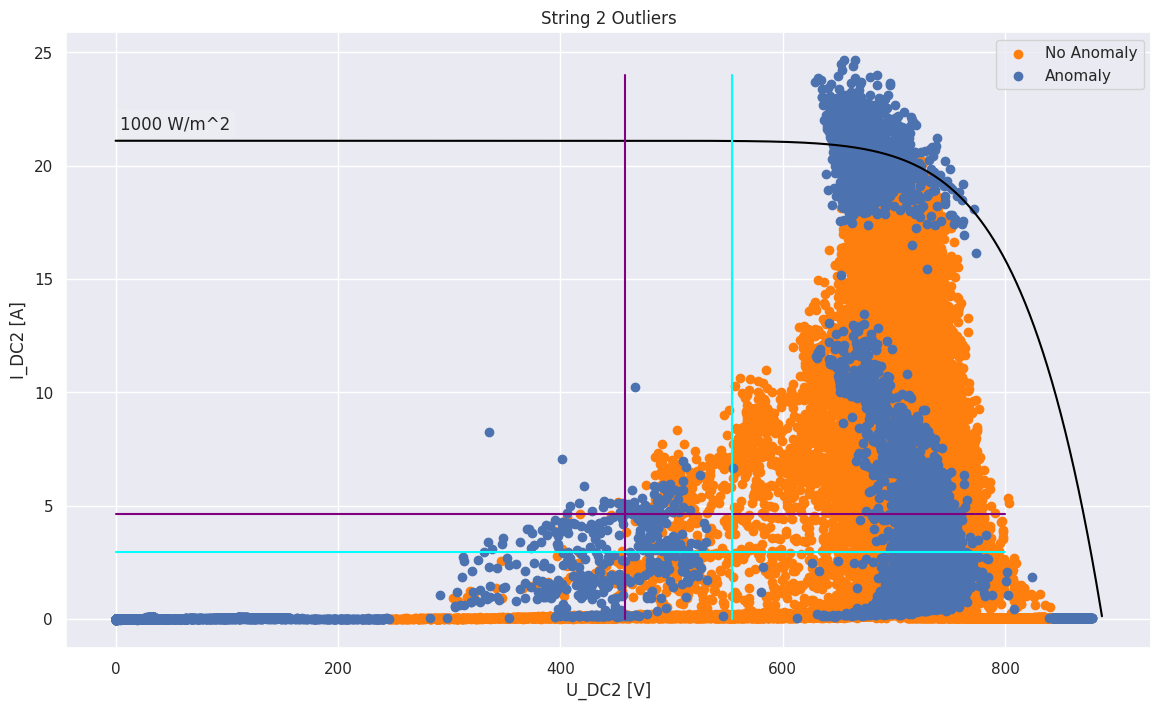

In [380]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

x_mean_power1 = 458.044
y_mean_power1 = 4.632

y_mean_power1_yaxis = np.arange(0,25,1)
x_mean_power1_yaxis = x_mean_power1*np.ones(y_mean_power1_yaxis.shape[0])

x_mean_power1_xaxis = np.arange(0,900,100)
y_mean_power1_xaxis = y_mean_power1*np.ones(x_mean_power1_xaxis.shape[0])

x_mean_voltage1 = 554.7488825117355
y_mean_current1 = 2.9501705940238563

y_mean_voltage1_axis = np.arange(0,25,1)
x_mean_voltage1_axis = x_mean_voltage1*np.ones(y_mean_voltage1_axis.shape[0])

x_mean_current1_axis = np.arange(0,900,100)
y_mean_current1_axis = y_mean_current1*np.ones(x_mean_current1_axis.shape[0])

plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
plt.plot(x_mean_voltage1_axis, y_mean_voltage1_axis, 'r', color='cyan')
plt.plot(x_mean_current1_axis, y_mean_current1_axis, 'r', color='cyan')

In [381]:
shading_power2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']> 0) & (ae_df['U_DC2']> 0) & (ae_df['U_DC2']< x_mean_power1) & (ae_df['I_DC2']< y_mean_power1)]
shading_voltage2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC2']< x_mean_voltage1) & (ae_df['I_DC2']< 19.1)]
shading_current2 = ae_df[(ae_df['Anomaly'] == 1) &(ae_df['I_DC2']>0) & (ae_df['U_DC2']>0) & (ae_df['I_DC2']< y_mean_current1) ]

In [382]:
shading_union = shading_power2.index.union(shading_voltage2.index).union(shading_current2.index)

In [383]:
ae_df.loc[shading_union,'Anomaly_String2'] = 'Shading'

In [384]:
ae_df[ae_df['Anomaly_String2'] == 'Shading']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
431,2019-08-06 05:45:00,196.260,196.073,0.010,0.017,1,No Fault,Shading,Shading,1.962600,3.333241
718,2019-08-08 06:05:00,235.070,236.358,0.010,0.020,1,No Fault,Shading,Shading,2.350700,4.727160
979,2019-08-09 16:00:00,434.194,727.848,8.924,0.942,1,No Fault,Shading,Shading,3874.747256,685.632816
980,2019-08-09 16:05:00,436.146,732.408,8.900,1.306,1,No Fault,Shading,Shading,3881.699400,956.524848
981,2019-08-09 16:10:00,438.282,723.834,8.092,0.950,1,No Fault,Shading,Shading,3546.577944,687.642300
...,...,...,...,...,...,...,...,...,...,...,...
150178,2023-05-31 16:00:00,434.826,347.726,7.842,3.326,1,No Fault,Shading,Shading,3409.905492,1156.536676
150339,2023-06-02 05:40:00,94.104,94.308,0.004,0.010,1,No Fault,Shading,Shading,0.376416,0.943080
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,Shading,11606.720720,4784.515500
150396,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1,No Fault,No Fault,Shading,11076.322320,2.585280


### CORTO CIRCUITO

<ipython-input-385-3dde8b8c8385>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-385-3dde8b8c8385>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
<ipython-input-385-3dde8b8c8385>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')


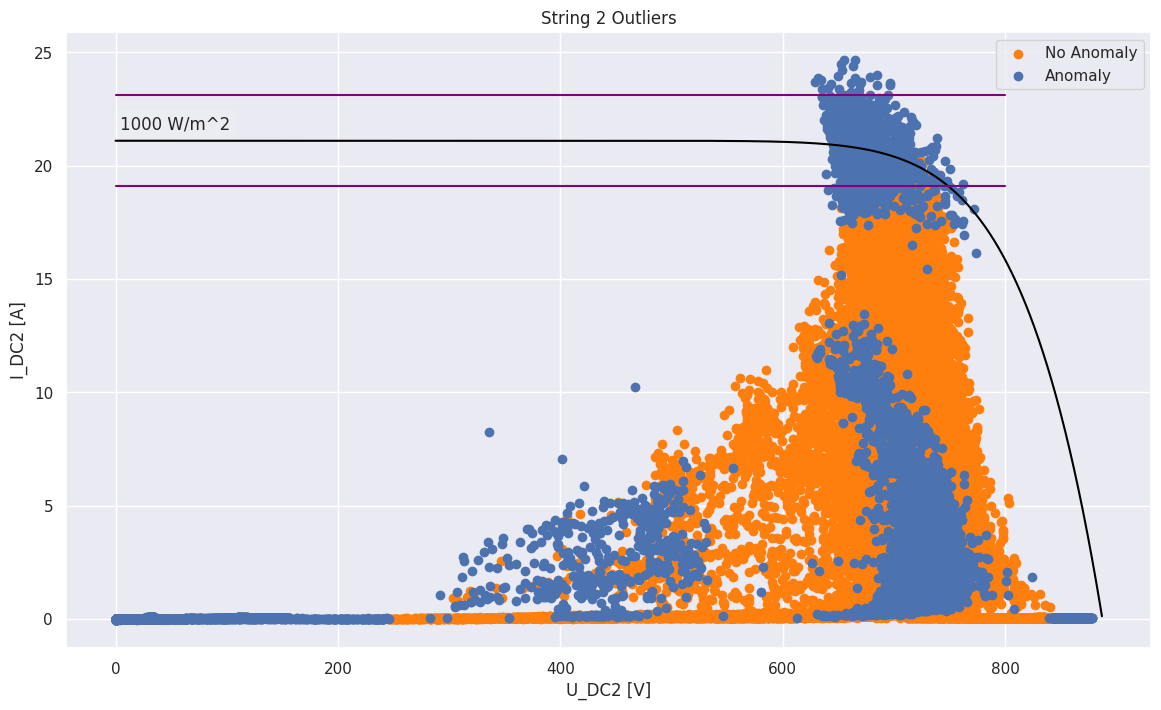

In [385]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')

In [386]:
sc_fault2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>=lower_limit_idc) & (ae_df['I_DC2']<=upper_limit_idc)]

In [387]:
sc_fault2.shape

(1464, 11)

In [388]:
index_sc2 = sc_fault2.index

In [389]:
ae_df.loc[index_sc2,'Anomaly_String2'] = 'Short Circuit'

In [390]:
ae_df[ae_df['Anomaly_String2'] == 'Short Circuit']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
635,2019-08-07 10:55:00,692.188,694.534,19.604,19.528,1,No Fault,Short Circuit,Short Circuit,13569.653552,13562.859952
636,2019-08-07 11:00:00,690.400,691.584,19.830,19.744,1,No Fault,Short Circuit,Short Circuit,13690.632000,13654.634496
637,2019-08-07 11:05:00,686.156,698.624,20.382,19.832,1,No Fault,Short Circuit,Short Circuit,13985.231592,13855.111168
638,2019-08-07 11:10:00,686.426,690.652,19.680,19.798,1,No Fault,Short Circuit,Short Circuit,13508.863680,13673.528296
639,2019-08-07 11:15:00,680.792,687.284,20.836,20.948,1,No Fault,Short Circuit,Short Circuit,14184.982112,14397.225232
...,...,...,...,...,...,...,...,...,...,...,...
150119,2023-05-31 11:05:00,690.784,682.082,19.938,20.456,1,No Fault,Short Circuit,Short Circuit,13772.851392,13952.669392
150121,2023-05-31 11:15:00,686.562,681.850,18.796,19.180,1,No Fault,Shading,Short Circuit,12904.619352,13077.883000
150122,2023-05-31 11:20:00,682.886,675.352,19.282,19.828,1,No Fault,Short Circuit,Short Circuit,13167.407852,13390.879456
150123,2023-05-31 11:25:00,677.530,665.904,20.820,21.242,1,No Fault,Short Circuit,Short Circuit,14106.174600,14145.132768


No hay fallas de corto circuito

### CIRCUITO ABIERTO

Todas aquellas fallas cuya corriente sea igual a 0

<ipython-input-391-79cc9354f321>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-391-79cc9354f321>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(voltage_zeros, current, 'r', color='purple')


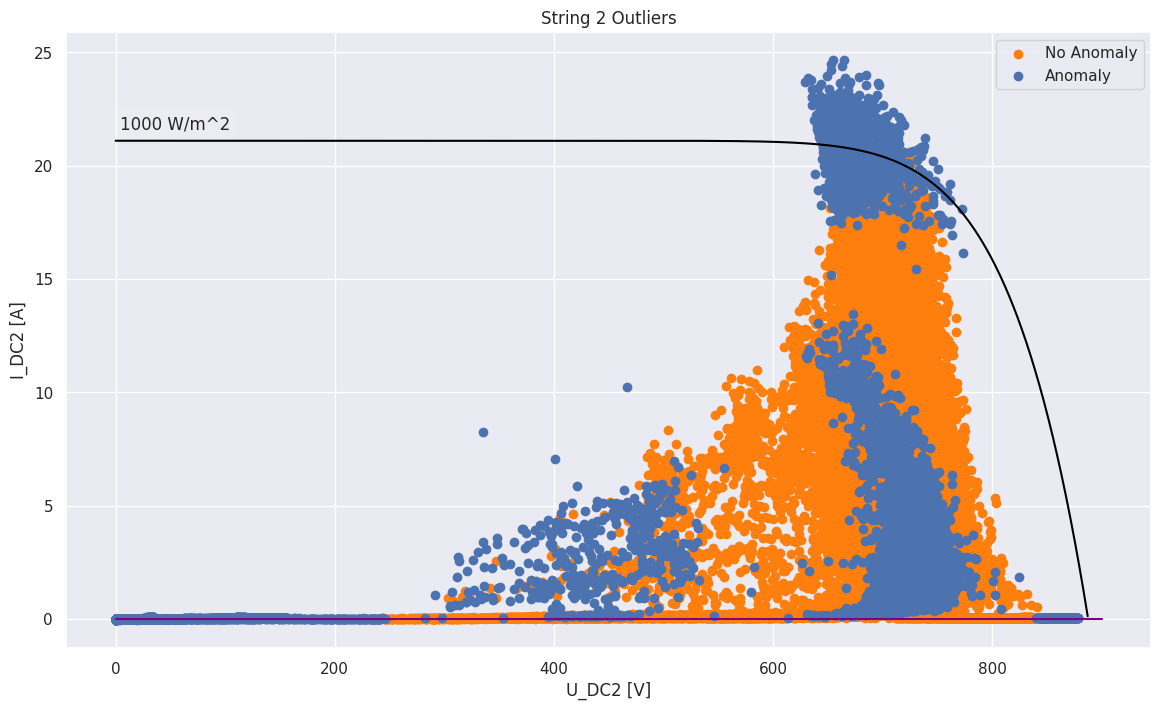

In [391]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

current = np.zeros(10)
voltage_zeros = np.arange(0,1000,100)


plt.plot(voltage_zeros, current, 'r', color='purple')

In [392]:
oc_fault2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']==0) & (ae_df['U_DC2']!=0)]

In [393]:
oc_fault2.shape

(14, 11)

In [394]:
index_oc2 = oc_fault2.index

In [395]:
ae_df.loc[index_oc2,'Anomaly_String2'] = 'Open Circuit'

In [396]:
ae_df[(ae_df['Anomaly_String2'] == 'Open Circuit')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
16543,2019-11-28 05:45:00,1.262,1.270,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
19660,2019-12-20 06:00:00,0.642,0.646,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
23701,2020-01-18 06:05:00,0.730,0.734,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
37189,2020-04-24 05:45:00,1.192,1.198,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
45305,2020-06-20 05:40:00,0.798,0.802,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
47719,2020-07-07 05:50:00,1.000,1.006,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
61567,2020-10-13 05:50:00,1.414,1.420,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
91943,2021-05-19 05:45:00,128.377,128.560,0.058,0.0,1,No Fault,Shading,Open Circuit,7.445866,0.0
119906,2022-04-01 06:00:00,59.167,11.820,0.094,0.0,1,No Fault,Shading,Open Circuit,5.561698,0.0
121011,2022-04-09 06:00:00,131.725,17.010,0.050,0.0,1,No Fault,Shading,Open Circuit,6.586250,0.0


In [397]:
ae_df

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
0,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,0,No Fault,No Fault,No Fault,2097.927000,2004.026970
1,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,0,No Fault,No Fault,No Fault,2939.484060,2795.873072
2,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,0,No Fault,No Fault,No Fault,2378.241912,2371.362336
3,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,0,No Fault,No Fault,No Fault,1879.591104,1818.844416
4,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,0,No Fault,No Fault,No Fault,1196.745084,1181.944720
...,...,...,...,...,...,...,...,...,...,...,...
150393,2023-06-02 10:10:00,712.860,698.410,15.514,15.758,0,No Fault,No Fault,No Fault,11059.310040,11005.544780
150394,2023-06-02 10:15:00,703.810,696.148,16.136,16.278,0,No Fault,No Fault,No Fault,11356.678160,11331.897144
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,Shading,11606.720720,4784.515500
150396,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1,No Fault,No Fault,Shading,11076.322320,2.585280


### FALLA NO IDENTIFICADA

<ipython-input-398-295e6125acbb>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-398-295e6125acbb>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')


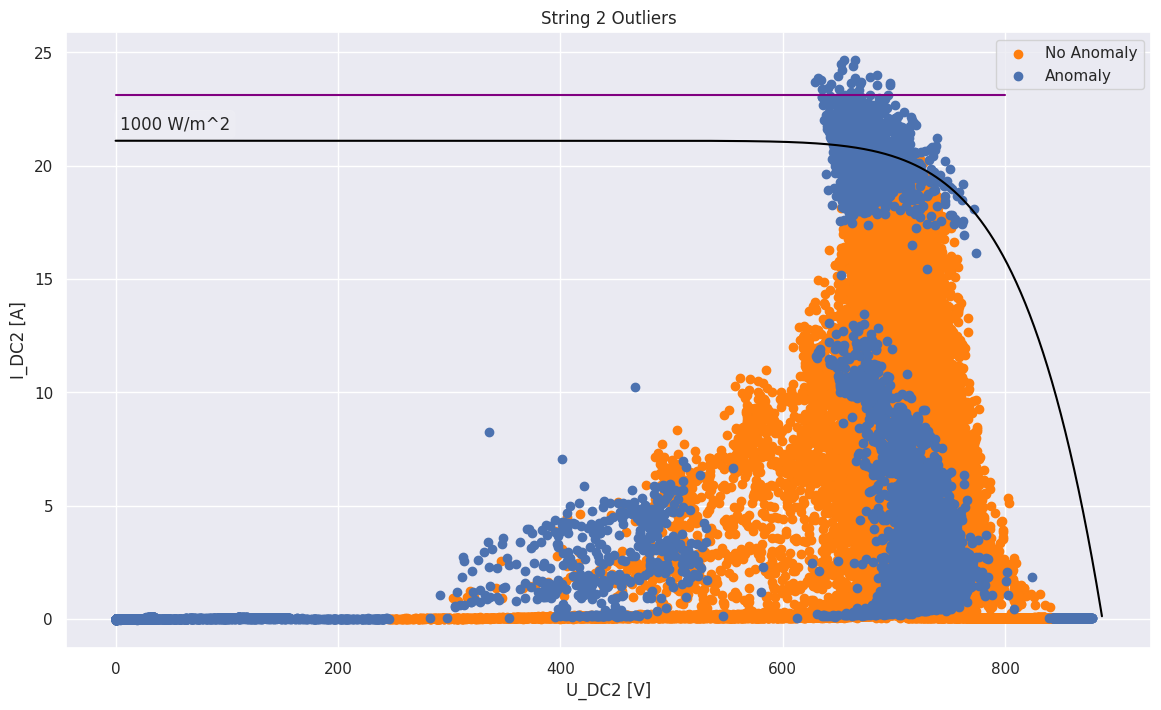

In [398]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')

In [399]:
unknown_2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>=upper_limit_idc)]

In [400]:
index_u2 = unknown_2.index

In [401]:
ae_df.loc[index_u2,'Anomaly_String2'] = 'Unknown'

In [402]:
ae_df[(ae_df['Anomaly_String2'] == 'Unknown')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
9033,2019-10-06 11:50:00,721.414,685.026,19.998,24.020,1,No Fault,Short Circuit,Unknown,14426.837172,16454.324520
9034,2019-10-06 11:55:00,698.836,669.122,20.810,23.596,1,No Fault,Short Circuit,Unknown,14542.777160,15788.602712
11766,2019-10-25 12:20:00,727.352,678.180,19.984,23.924,1,No Fault,Short Circuit,Unknown,14535.402368,16224.778320
11767,2019-10-25 12:25:00,688.700,661.026,21.424,23.666,1,No Fault,Short Circuit,Unknown,14754.708800,15643.841316
14054,2019-11-10 11:45:00,709.344,654.788,20.538,24.662,1,No Fault,Short Circuit,Unknown,14568.507072,16148.381656
18315,2019-12-10 11:25:00,660.246,649.214,22.368,23.964,1,No Fault,Short Circuit,Unknown,14768.382528,15557.764296
18316,2019-12-10 11:30:00,656.156,662.478,22.420,23.152,1,No Fault,Short Circuit,Unknown,14711.017520,15337.690656
19017,2019-12-15 11:05:00,682.290,668.416,21.570,23.338,1,No Fault,Short Circuit,Unknown,14716.995300,15599.492608
23355,2020-01-15 11:45:00,651.858,643.526,23.112,23.608,1,No Fault,Unknown,Unknown,15065.742096,15192.361808
23359,2020-01-15 12:05:00,711.740,652.504,20.838,24.470,1,No Fault,Short Circuit,Unknown,14831.238120,15966.772880


## ETIQUETADO GENERAL

In [403]:
conditions = [
    ((ae_df['Anomaly_String1'] == 'Unknown') | (ae_df['Anomaly_String2'] == 'Unknown')),
    ((ae_df['Anomaly_String1'] == 'Open Circuit') | (ae_df['Anomaly_String2'] == 'Open Circuit')),
    ((ae_df['Anomaly_String1'] == 'Short Circuit') | (ae_df['Anomaly_String2'] == 'Short Circuit')),
    ((ae_df['Anomaly_String1'] == 'Shading') | (ae_df['Anomaly_String2'] == 'Shading'))
]

choices = ['Unknown', 'Open Circuit', 'Short Circuit', 'Shading']

ae_df['Label'] = np.select(conditions, choices, default='No Fault')

In [404]:
no_fault = ae_df[ae_df['Label']=='No Fault']
shading = ae_df[ae_df['Label']=='Shading']
short_circuit = ae_df[ae_df['Label']=='Short Circuit']
open_circuit = ae_df[ae_df['Label']=='Open Circuit']
unknown = ae_df[ae_df['Label']=='Unknown']

<ipython-input-405-7a6b563fd4cb>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

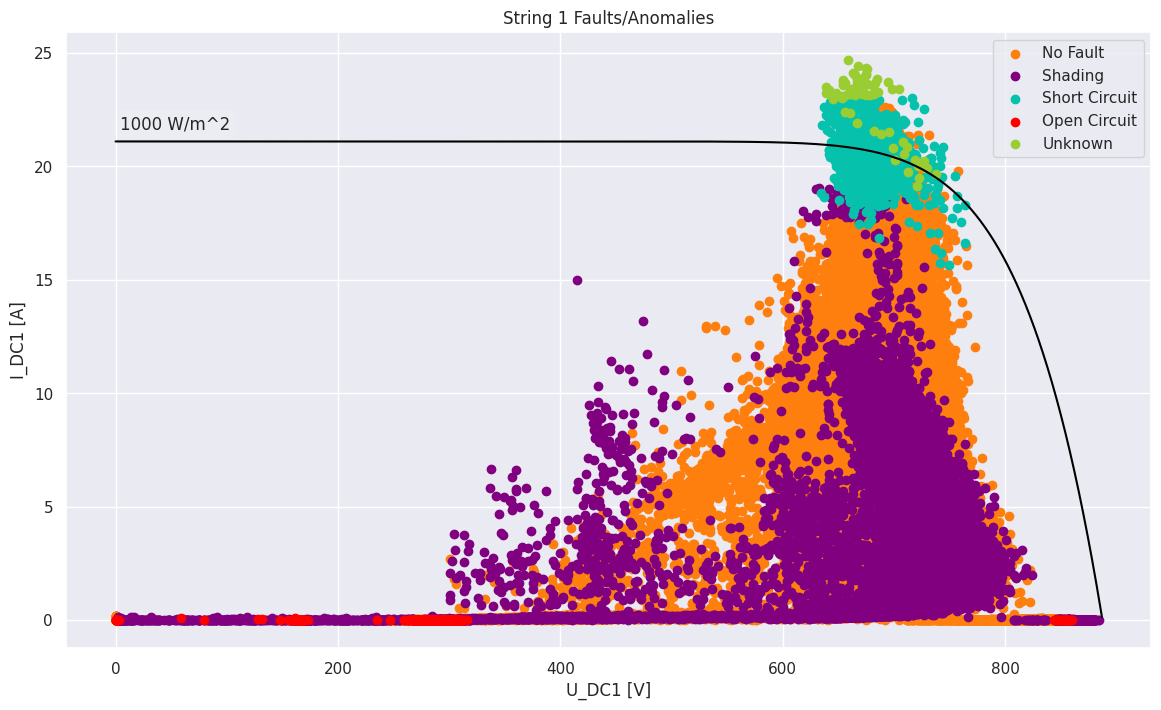

In [405]:
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.figure(figsize=(14, 8))
plt.plot(x, y, 'r', color='black')
plt.scatter(no_fault['U_DC1'], no_fault['I_DC1'], label='No Fault',color='#ff7f0e')
plt.scatter(shading['U_DC1'], shading['I_DC1'], label='Shading',color='purple')
plt.scatter(short_circuit['U_DC1'], short_circuit['I_DC1'], label='Short Circuit',color= '#06c2ac')
plt.scatter(open_circuit['U_DC1'], open_circuit['I_DC1'], label='Open Circuit',color='red')
plt.scatter(unknown['U_DC1'], unknown['I_DC1'], label='Unknown',color='yellowgreen')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Faults/Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))


<ipython-input-406-c01f9a45b9fd>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

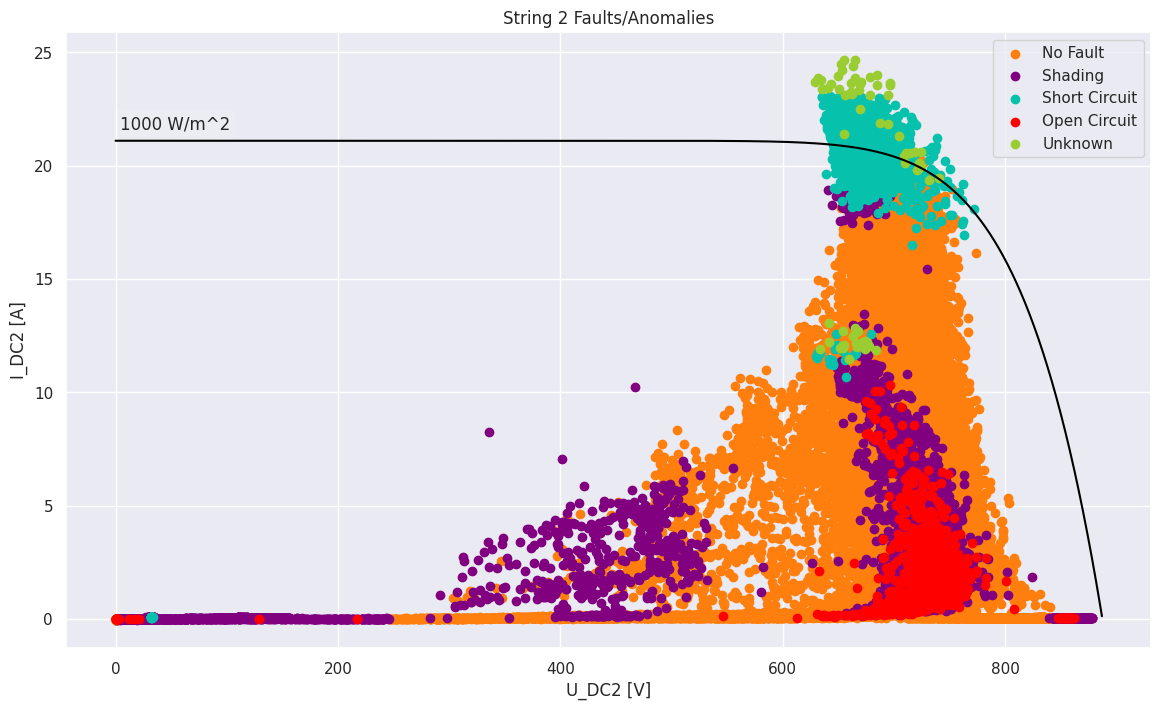

In [406]:
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.figure(figsize=(14, 8))
plt.plot(x, y, 'r', color='black')
plt.scatter(no_fault['U_DC2'], no_fault['I_DC2'], label='No Fault',color='#ff7f0e')
plt.scatter(shading['U_DC2'], shading['I_DC2'], label='Shading',color='purple')
plt.scatter(short_circuit['U_DC2'], short_circuit['I_DC2'], label='Short Circuit',color= '#06c2ac')
plt.scatter(open_circuit['U_DC2'], open_circuit['I_DC2'], label='Open Circuit',color='red')
plt.scatter(unknown['U_DC2'], unknown['I_DC2'], label='Unknown',color='yellowgreen')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Faults/Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))


## ANÁLISIS DE ETIQUETADO

In [407]:
labeled_df = ae_df[['Timestamp','U_DC1','U_DC2','I_DC1','I_DC2','Label']]

<ipython-input-408-772ecc8ae998>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks()/1000)


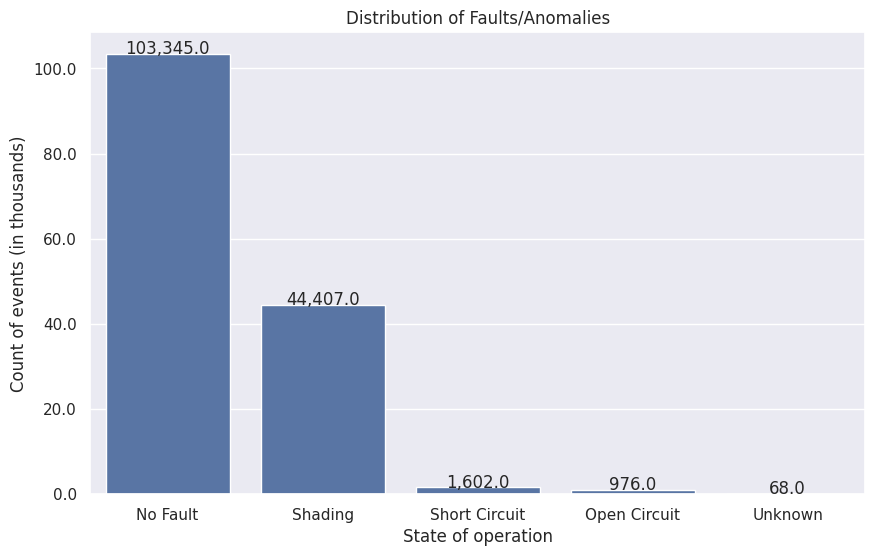

In [408]:
plt.figure(figsize=(10, 6))

# Calculate counts and sort in descending order
order =labeled_df['Label'].value_counts().index
ax = sns.countplot(x='Label',data=labeled_df,order=order)
plt.title('Distribution of Faults/Anomalies')
plt.xlabel('State of operation')
plt.ylabel('Count of events (in thousands)')

ax.set_yticklabels(ax.get_yticks()/1000)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+0.2,
            s = '{:,}'.format(height),  # Original value here
            ha = 'center')

plt.show()

In [409]:
order

Index(['No Fault', 'Shading', 'Short Circuit', 'Open Circuit', 'Unknown'], dtype='object')

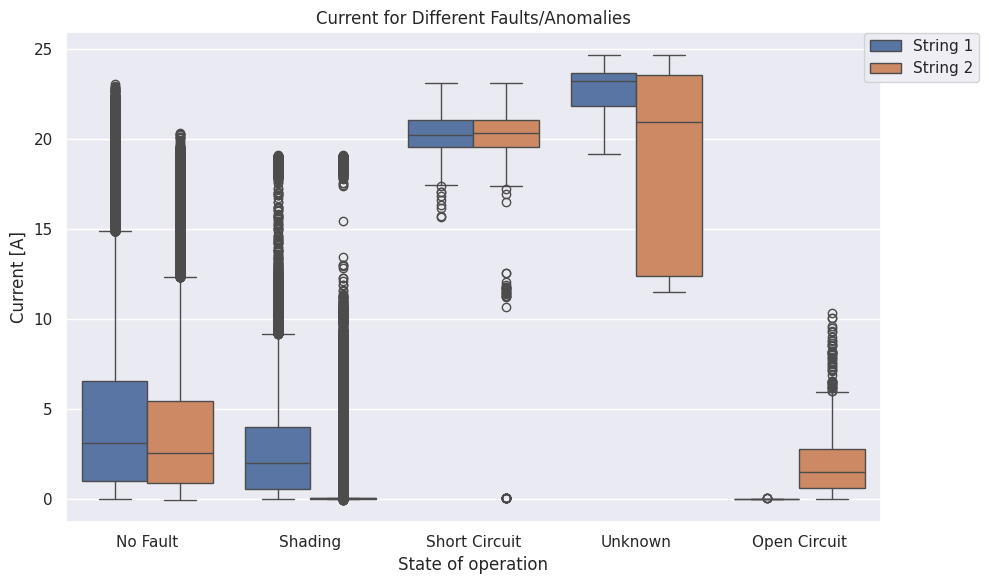

In [410]:
# Create a new dataframe
ae_df_new = pd.concat([
    ae_df[['Label', 'I_DC1']].rename(columns={'I_DC1': 'Current'}).assign(String='String 1'),
    ae_df[['Label', 'I_DC2']].rename(columns={'I_DC2': 'Current'}).assign(String='String 2')
])

plt.figure(figsize=(10, 6))
ax =sns.boxplot(x='Label', y='Current', hue='String', data=ae_df_new)
ax.legend(loc='upper right', bbox_to_anchor=(1.13,1.015))
plt.title('Current for Different Faults/Anomalies')
plt.xlabel('State of operation')
plt.ylabel('Current [A]')

plt.tight_layout()
plt.show()

In [411]:
ae_df_new[(ae_df_new['Label']=='Shading') & (ae_df_new['String']=='String 2')]

,Label,Current,String
431,Shading,0.017,String 2
718,Shading,0.020,String 2
979,Shading,0.942,String 2
980,Shading,1.306,String 2
981,Shading,0.950,String 2
...,...,...,...
150178,Shading,3.326,String 2
150339,Shading,0.010,String 2
150395,Shading,10.250,String 2
150396,Shading,0.080,String 2


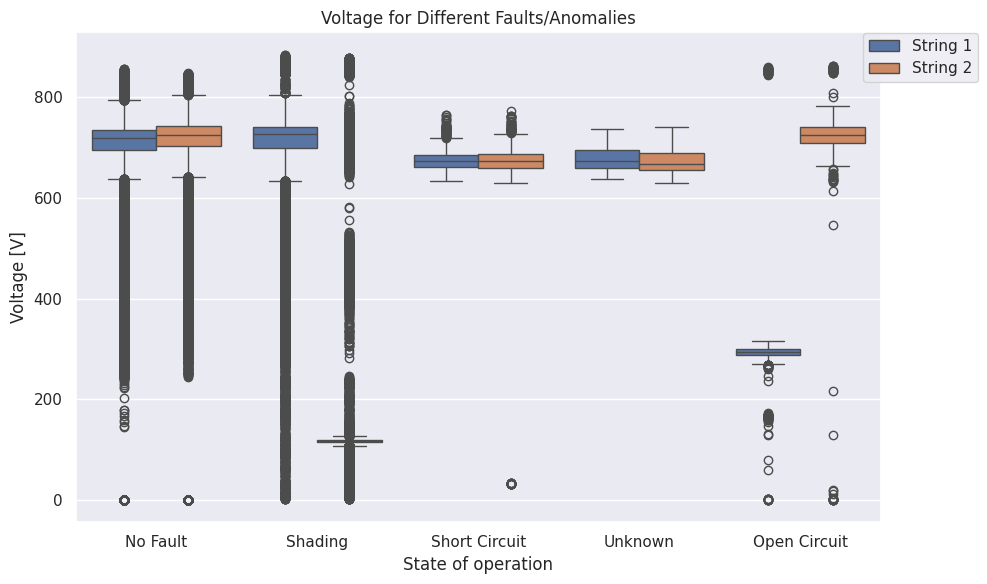

In [412]:
# Create a new dataframe
ae_df_new = pd.concat([
    ae_df[['Label', 'U_DC1']].rename(columns={'U_DC1': 'Voltage'}).assign(String='String 1'),
    ae_df[['Label', 'U_DC2']].rename(columns={'U_DC2': 'Voltage'}).assign(String='String 2')
])

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Label', y='Voltage', hue='String', data=ae_df_new)
ax.legend(loc='upper right', bbox_to_anchor=(1.13,1.015))
plt.title('Voltage for Different Faults/Anomalies')
plt.xlabel('State of operation')
plt.ylabel('Voltage [V]')

plt.tight_layout()
plt.show()

In [413]:
labeled_df.to_csv('df_with_labels_ae11.csv', sep=';', index=False, encoding='utf-8')